In [1]:
from models.dataset import Dataset, DatasetReality
from models.pipeline import prep_data, train_classifier
from ana.visual import STAT, ROC, FEAT

import numpy as np
import random
np.random.seed(7)
random.seed(7)

import warnings
from sklearn.linear_model import LogisticRegression
warnings.simplefilter('ignore')

## for evaluation
import matplotlib.pyplot as plt

In [2]:
# dataset, X, y, pairs, index = prep_data(Dataset, shuffle_interval=3)
dataset = prep_data(Dataset, test=0.1, shuffle=True, seed=None,
                    text_idf=True, categ_idf=False,
                    cross_simi=True,
                    norm_simi=True, suppress_freq=1)

 - Preparing data..
 - Initialize image encoder..
  - Set feature names..
  - Build category level idf..
  - Build category similarity..
  - Build similarity normalizer..
 - Initialize text encoder..
 - Initialize joint encoder..
  - Build token-category similarities..
 - Set feature names..
- Fetching training data..
     Fetched - [82]
- Fetching test data..
     Fetched - [10]
  - Data train shape (246, 10443)
  - Data test shape (30, 10443)


In [12]:
# length of feature of reasonability dataset
print(16+17+4+16*17+1)

# length of feature of consistency dataset
print(5+16+17+16*17+298+298*(16+17))

310
10442


### evaluation - consisstency discriminator 

In [9]:
clf = train_classifier(dataset,
                       class_weight={1: 1, 0: 0.1},
                       C=10)

In [10]:
# higher class weight of 0 will always make it easier in term of precision
# because of imbalance

# loose C to encourage more features
# l1 learns sparse representation
y_true = dataset.data_test[:,-1].toarray().flatten()
y_prob = clf.predict_proba(dataset.data_test[:,:-1])[:,1]

10 positives out of 30 test examples
Overall accuracy: 0.633333
*Recall(thresh=0.5)/AccuracyOf1: 0.800000
Precision(thresh=0.5): 0.470588
AccuracyOf0(thresh=0.5): 0.633333


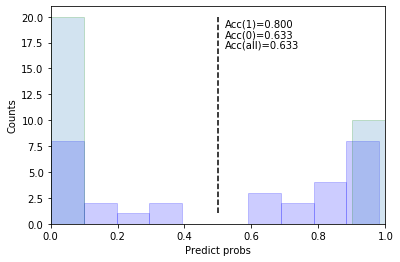

In [11]:
### the bars move to the right would be better?
suffix = 'temp'
STAT(y_true, y_prob, path='STAT_%s' % suffix)

In [12]:
# when shut down category idf, performance improves
# because the test set contains many chart thing..
# it should be right

precision | recall | F1 | threshold
------------------------------
0.385 | 1.000 | 0.556 | 0.021
0.360 | 0.900 | 0.514 | 0.025
0.375 | 0.900 | 0.529 | 0.055
0.391 | 0.900 | 0.545 | 0.089
0.409 | 0.900 | 0.563 | 0.103
0.400 | 0.800 | 0.533 | 0.246
0.421 | 0.800 | 0.552 | 0.319
0.444 | 0.800 | 0.571 | 0.368
0.471 | 0.800 | 0.593 | 0.629
0.438 | 0.700 | 0.538 | 0.677
0.400 | 0.600 | 0.480 | 0.684
0.429 | 0.600 | 0.500 | 0.696
0.462 | 0.600 | 0.522 | 0.711
0.500 | 0.600 | 0.545 | 0.812
0.455 | 0.500 | 0.476 | 0.814
0.500 | 0.500 | 0.500 | 0.816
0.444 | 0.400 | 0.421 | 0.837
0.500 | 0.400 | 0.444 | 0.886
0.571 | 0.400 | 0.471 | 0.909
0.500 | 0.300 | 0.375 | 0.911
0.600 | 0.300 | 0.400 | 0.921
0.500 | 0.200 | 0.286 | 0.950
0.667 | 0.200 | 0.308 | 0.964
0.500 | 0.100 | 0.167 | 0.974
0.000 | 0.000 | nan | 0.982
------------------------------


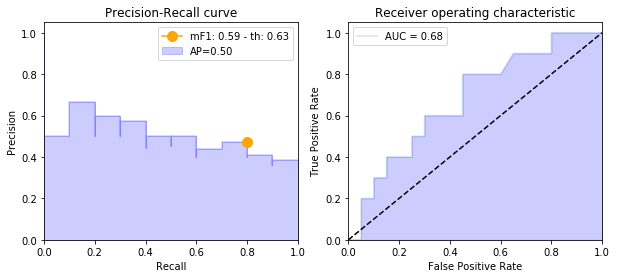

In [13]:
ROC(y_true, y_prob, path='ROC_%s' % suffix)

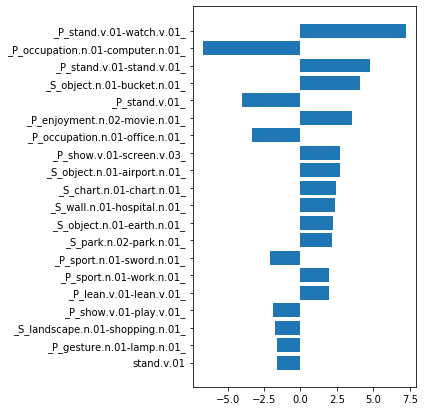

In [14]:
FEAT(dataset, clf, path='FEAT_%s' % suffix)

### error analysis - consistency discriminator

In [8]:
y_true.astype(int)

array([1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 0, 0, 1, 0, 0])

In [9]:
(y_prob > 0.687).astype(int)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1,
       0, 0, 1, 0, 0, 1, 0, 1])

In [10]:
y_prob

array([0.58481366, 0.57154211, 0.61854462, 0.61931428, 0.61931428,
       0.61931428, 0.58481366, 0.57154211, 0.58481366, 0.23886008,
       0.60562418, 0.26974359, 0.63946162, 0.65191065, 0.60562418,
       0.88489954, 0.63946162, 0.88489954, 0.82251494, 0.30538492,
       0.82203806, 0.9005642 , 0.60640332, 0.20853314, 0.68722989,
       0.63946162, 0.65619668, 0.70855047, 0.22910718, 0.70855047])

In [11]:
index[ind_test:]/3

array([72.        , 72.33333333, 72.66666667, 86.        , 86.33333333,
       86.66666667, 14.        , 14.33333333, 14.66666667, 57.        ,
       57.33333333, 57.66666667, 23.        , 23.33333333, 23.66666667,
       83.        , 83.33333333, 83.66666667, 67.        , 67.33333333,
       67.66666667, 25.        , 25.33333333, 25.66666667, 68.        ,
       68.33333333, 68.66666667, 47.        , 47.33333333, 47.66666667])

In [12]:
coeff_dict = dict(zip(dataset.features_, clf.coef_.tolist()[0]))

In [54]:
from scipy import sparse

ind = 3
print(dataset.txt_encoder.tokenizer(pairs[ind_test:][ind][1]))
print(dataset.img_encoder.layer2keyword(pairs[ind_test:][ind][0]))

vec = dataset.encode(*pairs[ind_test:][ind])
tuples = []
for i in np.where(vec!=0)[0]:
    feature = dataset.features_[i]
    tuples.append((feature, vec[i], coeff_dict[feature]))
for f, v, c in sorted(tuples, key=lambda x: abs(x[1]))[::-1]:
    print('%40s % 10.6f %.6f' % (f,v,c))

# bigram doesn't act in the similarity.
# thus bigrams are not visible here since we filter out zero features

['woman.n.01', 'keep.v.01', 'plaything.n.01']
['indoor.a.01', 'object.n.01', 'sundries.n.01', 'person.n.02', 'sit.v.01']
          _S_object.n.01-plaything.n.01_  10.491570 0.000000
                  _P_sit.v.01-keep.v.01_   9.868253 0.000000
        _S_sundries.n.01-plaything.n.01_   7.738709 0.000000
          _P_person.n.02-plaything.n.01_   6.692120 0.000000
                keep.v.01 plaything.n.01   4.839452 0.000000
             _P_sit.v.01-plaything.n.01_  -4.793330 0.000000
               _P_person.n.02-keep.v.01_  -4.793330 0.000000
             _S_sundries.n.01-keep.v.01_  -4.793330 0.000000
               _S_object.n.01-keep.v.01_  -4.793330 0.000000
          _S_indoor.a.01-plaything.n.01_  -4.793330 0.000000
               _S_indoor.a.01-keep.v.01_  -4.793330 0.000000
                    woman.n.01 keep.v.01   4.433987 0.000000
                          plaything.n.01   4.433987 0.000000
                               keep.v.01   4.433987 0.000000
                         

In [7]:
index = 87
img = 'images/%i.svg' % index
txt = 'text/%i.txt' % index
dataset.getOneLayerSent(txt, img)

(['A1', 'A2114', 'A322'], 'A woman holds a toy.\n')

In [16]:
## 0
# only woman and n_layers carries non-zero value as a feature
# caused by insufficient data

In [21]:
print(dataset.joint_encoder.idf_['plaything.n.01'])
print(dataset.joint_encoder.simi_['_S_object.n.01-plaything.n.01_'])
print(dataset.joint_encoder.simi_normalizer.transform(dataset.joint_encoder.simi_['_S_object.n.01-plaything.n.01_']))
print(dataset.joint_encoder.simi_normalizer.mean)
print(dataset.joint_encoder.simi_normalizer.std)

4.433987204485146
2.2512917986064953
2.3661705326503535
0.7060029855494958
0.6530758420552714


In [22]:
## 1
# object and plaything are moderately similar
# plaything is very rare (only appear once/twice (didn't check))
# though this feature in this datus is large, it didn't take any effect

In [46]:
pairs[ind_test:]

[(['A2211', 'A3211'], 'A woman looks in the window.\n'),
 (['A2211', 'A3211'], 'A man is watching a movie.\n'),
 (['A1', 'A312'], 'A woman looks in the window.\n'),
 (['A1', 'A2114', 'A322'], 'A woman holds a toy.\n'),
 (['A1', 'A2114', 'A322'], 'A woman works in an office.\n'),
 (['A1', 'A2121', 'A3212'], 'A woman holds a toy.\n'),
 (['A1', 'A325'], 'A woman is showing love'),
 (['A1', 'A325'], 'A man drinks coffee at the airport window'),
 (['A2121', 'A3213'], 'A woman is showing love'),
 (['A1', 'A312'], 'A woman is standing to annotate.\n'),
 (['A1', 'A312'], 'A man is riding a bike on the street.\n'),
 (['A1', 'A2222', 'A324'], 'A woman is standing to annotate.\n'),
 (['A1', 'A2211', 'A315'], 'A man is riding a bike on the street.\n'),
 (['A1', 'A2211', 'A315'], 'A woman is playing with a bunch of balloons.\n'),
 (['A2122', 'A312'], 'A man is riding a bike on the street.\n'),
 (['A1', 'A2122', 'A312'], 'A woman sat to rest.\n'),
 (['A1', 'A2122', 'A312'], 'There are three trademar

In [21]:
dataset.getOneLayerSent(txt_name='text/72.txt',
                        img_name='images/72.svg')

(['A1', 'A2222', 'A325'], 'A man and a woman jump to celebrate.')

### reality discriminator

In [75]:
dataset_r = prep_data(DatasetReality,
                      index_tup=(dataset.index_train,
                                 dataset.index_test), 
                      categ_idf=False, 
                      cross_simi=True,
                      norm_simi=True)

 - Preparing data..
 - Initialize image encoder..
  - Set feature names..
  - Build category level idf..
  - Build category similarity..
  - Build similarity normalizer..
 - Initialize text encoder..
 - Initialize joint encoder..
  - Build token-category similarities..
 - Set feature names..
 - Build fake layers..
 - Set feature names..
- Fetching training data..
     Fetched - [82]
- Fetching test data..
     Fetched - [10]
  - Data train shape (164, 311)
  - Data test shape (20, 311)


In [100]:
clf_r = train_classifier(dataset_r,
                         class_weight={1: 1, 0: 0.1},
                         C=20)
# low negative weight will suppress largest coeffcients, leading to better results

In [101]:
y_true = dataset_r.data_test[:,-1].toarray().flatten()
y_prob = clf_r.predict_proba(dataset_r.data_test[:,:-1])[:,1]

10 positives out of 20 test examples
Overall accuracy: 0.750000
*Recall(thresh=0.5)/AccuracyOf1: 0.900000
Precision(thresh=0.5): 0.692308
AccuracyOf0(thresh=0.5): 0.750000


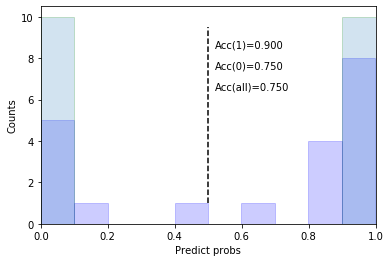

In [102]:
suffix = 'temp1'
STAT(y_true, y_prob, path='realitySTAT_%s' % suffix)

precision | recall | F1 | threshold
------------------------------
0.714 | 1.000 | 0.833 | 0.407
0.692 | 0.900 | 0.783 | 0.631
0.667 | 0.800 | 0.727 | 0.806
0.727 | 0.800 | 0.762 | 0.814
0.700 | 0.700 | 0.700 | 0.826
0.667 | 0.600 | 0.632 | 0.854
0.750 | 0.600 | 0.667 | 0.926
0.714 | 0.500 | 0.588 | 0.941
0.833 | 0.500 | 0.625 | 0.960
1.000 | 0.500 | 0.667 | 0.968
1.000 | 0.400 | 0.571 | 0.969
1.000 | 0.300 | 0.462 | 0.987
1.000 | 0.200 | 0.333 | 0.993
1.000 | 0.100 | 0.182 | 0.998
------------------------------


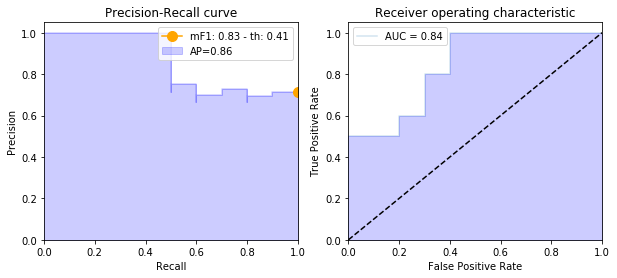

In [103]:
ROC(y_true, y_prob, path='realityROC_%s' % suffix)

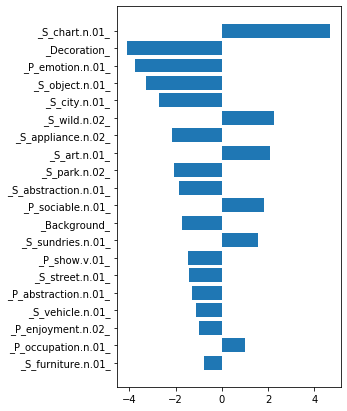

In [104]:
FEAT(dataset_r, clf_r, path='realityFEAT_%s' % suffix)

wild - gesture ++ (play in the park)

surrounding - object? --
person - interaction? --

if object stuff, interaction is rare?

In [105]:
# todo - unseen keywords

why almost all keywords contain chart..

high lamb -> less charts things

### error analysis - predictor

In [106]:
from models.model import Discriminator
discriminator = Discriminator(dataset, clf, dataset_r, clf_r)
# getMaxContrbutionFeature(['A2121', 'A323', 'A4'], 'A woman holds a toy.\n', discriminator, lamb=0.7)

from models.model import categMetric
categMetric(discriminator, lamb=0.8)

 [0] ------ 73 -----

Layers:  ['A2211', 'A3211']
Keywords:  ['landscape.n.01', 'city.n.01', 'street.n.01', 'person.n.02', 'stand.v.01', 'lean.v.01']
Sentence: A woman looks in the window.
Tokens: ['woman.n.01', 'look.v.01', 'window.n.01']
Seen tokens: ['woman.n.01', 'look.v.01', 'window.n.01']

Predicted layers:  ['A1', 'A2222', 'A312']
Predicted keywords: ['landscape.n.01', 'nature.n.03', 'wild.n.02', 'interaction.n.01', 'abstraction.n.01'] Prob: 0.948743
Max contributed features: [('real', '_S_abstraction.n.01-P_abstraction.n.01_', 9.083701830724229, 0.5355773757906438), ('cons', '_S_abstraction.n.01-P_abstraction.n.01_', 9.083701830724229, 0.12108713156404108), ('cons', '_Background_', 1.0, 0.6689912947476315), ('cons', '_S_wild.n.02_', 1.0, 0.6194582720633677), ('real', '_S_wild.n.02_', 1.0, 2.2684785139298467), ('cons', '_S_abstraction.n.01_', 1.0, 0.3500668636540635), ('cons', '_P_abstraction.n.01_', 1.0, 0.2664237984931772), ('real', '_S_nature.n.03-P_person.n.02_', 2.663276494

Layers:  ['A1', 'A2122', 'A312']
Keywords:  ['room.n.01', 'abstraction.n.01', 'art.n.01', 'interaction.n.01', 'abstraction.n.01']
Sentence: A woman sat to rest.
Tokens: ['woman.n.01', 'sit.v.01', 'rest.v.01']
Seen tokens: ['woman.n.01', 'sit.v.01', 'rest.v.01']

Predicted layers:  ['A1', 'A2222', 'A322']
Predicted keywords: ['landscape.n.01', 'nature.n.03', 'wild.n.02', 'person.n.02', 'sit.v.01'] Prob: 0.997306
Max contributed features: [('cons', '_P_sit.v.01-sit.v.01_', 2.952809464587893, 1.0685920904119093), ('real', '_S_abstraction.n.01-P_abstraction.n.01_', 9.083701830724229, 0.5355773757906438), ('cons', '_S_abstraction.n.01-P_abstraction.n.01_', 9.083701830724229, 0.12108713156404108), ('cons', 'sit.v.01 rest.v.01', 4.725693427236653, 0.1558381892932843), ('cons', '_Background_', 1.0, 0.6689912947476315), ('cons', '_S_wild.n.02_', 1.0, 0.6194582720633677), ('real', '_S_wild.n.02_', 1.0, 2.2684785139298467), ('cons', 'rest.v.01', 4.725693427236653, 0.11969676834234887), ('real', '

0.5627154708037061

### errata
26: gesture -> show?

### observation


* "man and woman -> interaction" needs bigram embedding - but the pairwise similarity is missing here

* some keywords, eg. charts, are weighted too much and can easily be put forward -- single tokens seems only detrimental?

* hope that length of sentence could help determine the number of layers? # simply add a sentence length feature doesn't work

* replace indoor with room doesn't improve because it's idf reweighted

* seems that good discriminator doesn't necessarily mean good predictor. When turning off category idf, the discriminator (consistency) looks good, but the predictions get worse

### optimize lamb 

In [107]:
from models.model import Discriminator
import dill
discriminator = Discriminator(dataset, clf, dataset_r, clf_r)
with open('results/discriminator.pkl', 'wb') as f:
    dill.dump(discriminator, f)

In [23]:
# from tools.text_process import LemmaTokenizer
# from models.model import Discriminator
# from models.model import categMetric
# import numpy as np
# import dill
import warnings
warnings.simplefilter('ignore')

# discriminator = Discriminator.unpickle()
mF1s = []
lambs = np.arange(0,1.2,0.2)
for lamb in lambs:
    mF1s.append(categMetric(discriminator, lamb=lamb,
                            verbose=False))

 [0] ------ 73 -----

Acc: 0.810811 - Precision: 0.666667 - Recall: 0.250000 - F1: 0.363636
 [1] ------ 87 -----

Acc: 0.810811 - Precision: 0.666667 - Recall: 0.250000 - F1: 0.363636
 [2] ------ 15 -----

Acc: 0.972973 - Precision: 1.000000 - Recall: 0.750000 - F1: 0.857143
 [3] ------ 58 -----

Acc: 0.837838 - Precision: 0.333333 - Recall: 0.200000 - F1: 0.250000
 [4] ------ 24 -----

Acc: 0.756757 - Precision: 0.333333 - Recall: 0.125000 - F1: 0.181818
 [5] ------ 84 -----

Acc: 0.756757 - Precision: 0.333333 - Recall: 0.125000 - F1: 0.181818
 [6] ------ 68 -----

Acc: 0.837838 - Precision: 1.000000 - Recall: 0.333333 - F1: 0.500000
 [7] ------ 26 -----

Acc: 0.837838 - Precision: 1.000000 - Recall: 0.333333 - F1: 0.500000
 [8] ------ 69 -----

Acc: 0.756757 - Precision: 0.333333 - Recall: 0.125000 - F1: 0.181818
 [9] ------ 48 -----

Acc: 0.864865 - Precision: 0.333333 - Recall: 0.250000 - F1: 0.285714
mean F1: 0.366558
 [0] ------ 73 -----

Acc: 0.702703 - Precision: 0.285714 - Re

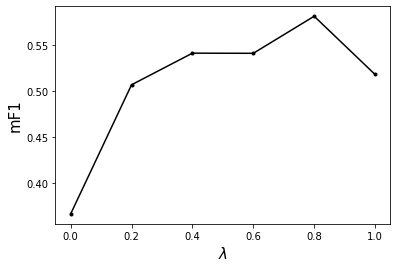

In [24]:
import matplotlib.pyplot as plt
plt.figure()
plt.plot(lambs, mF1s,'k.-')
plt.xlabel('$\lambda$', fontsize=15)
plt.ylabel('mF1', fontsize=15)
plt.savefig('results/predictor_lamb-metric')
plt.show()

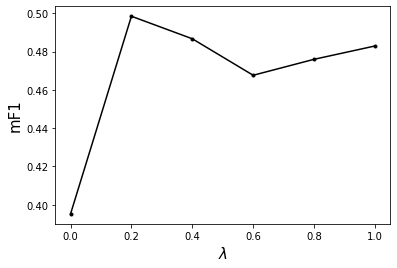

In [45]:
import matplotlib.pyplot as plt
plt.figure()
plt.plot(lambs, mF1s,'k.-')
plt.xlabel('$\lambda$', fontsize=15)
plt.ylabel('mF1', fontsize=15)
plt.savefig('results/predictor_lamb-metric')
plt.show()

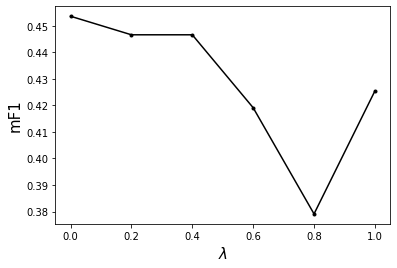

In [14]:
import matplotlib.pyplot as plt
plt.figure()
plt.plot(lambs, mF1s,'k.-')
plt.xlabel('$\lambda$', fontsize=15)
plt.ylabel('mF1', fontsize=15)
plt.show()

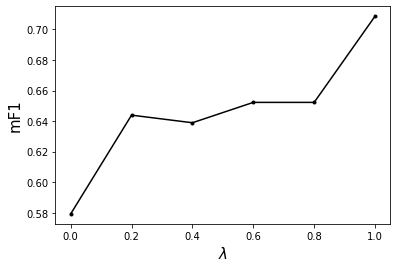

In [12]:
import matplotlib.pyplot as plt
plt.figure()
plt.plot(lambs, mF1s,'k.-')
plt.xlabel('$\lambda$', fontsize=15)
plt.ylabel('mF1', fontsize=15)
plt.show()

* which features contribute to the prob?
* is similarity really necessary? no negative cross-simi pairs will contribute

    * simi -> rule based
    * one-hot -> learning

In [75]:
from models.model import Discriminator
discriminator = Discriminator.unpickle()

from models.model import exhaustiveSearch
layers, prob = exhaustiveSearch('A man is showing a chart.',
                                 discriminator,
                                 lamb=0.8)
print(layers, prob)

['A2121', 'A324'] 0.9959498762690687


In [76]:
import glob
import random
def getMaterial(layer):
    l = glob.glob('material/%s*.png' % layer)
    return random.choice(l)

from tools.image_process import stack_svgs
stack_svgs([getMaterial(layer) for layer in layers])

from IPython.display import SVG, display
from IPython.display import HTML
def show_svg():
    # display(HTML("<style>.container { width:100% !important; }</style>"))
    # style = "<style>svg{width:50% !important;height:50% !important;}</style>"
    # display(HTML(style))
    display(SVG('stack.svg'))
show_svg()

Canvas size: (969, 899)
File: material/A2121_(10).png
File: material/A324_(6).png


In [32]:
## Check feature and vector are consistent

In [31]:
layers, sentence = dataset.getOneLayerSent(txt_name='text/1.txt', img_name='images/6.svg')
print(layers)
print(dataset.img_encoder.layer2keyword(layers))
print(sentence)
list(filter(lambda x: x[1]!=0, zip(dataset.joint_encoder.features_, dataset.joint_encoder.encode(layers, sentence))))

['A2112', 'A311']
['indoor.a.01', 'object.n.01', 'appliance.n.02', 'interaction.n.01', 'occupation.n.01']
A man looks at his chart with his back.



[('_S_object.n.01_back.n.01_', 1.845826690498331),
 ('_S_object.n.01_chart.n.01_', 1.6916760106710724),
 ('_S_object.n.01_man.n.01_', 1.845826690498331),
 ('_S_appliance.n.02_back.n.01_', 1.1526795099383855),
 ('_S_appliance.n.02_chart.n.01_', 1.072636802264849),
 ('_S_appliance.n.02_man.n.01_', 1.2396908869280152),
 ('_P_interaction.n.01_back.n.01_', 1.1526795099383855),
 ('_P_interaction.n.01_chart.n.01_', 1.4403615823901665),
 ('_P_interaction.n.01_man.n.01_', 1.1526795099383855),
 ('_P_occupation.n.01_back.n.01_', 1.1526795099383855),
 ('_P_occupation.n.01_chart.n.01_', 1.4403615823901665),
 ('_P_occupation.n.01_man.n.01_', 1.1526795099383855)]

## XGB

In [9]:
import xgboost as xgb

In [10]:
w = np.array([1 if y_ == 1 else 0.3 for y_ in y[:ind_test]])
dtrain = xgb.DMatrix(X[:ind_test], label=y[:ind_test], weight=w, feature_names=dataset.features_)

dtest = xgb.DMatrix(X[ind_test:],
                    label=y[ind_test:],
                    feature_names=dataset.features_,)

In [11]:
param = {'max_depth': 2, 'eta': 1, 'objective': 'binary:logistic'}
param['nthread'] = 4
param['eval_metric'] = 'auc'

evallist = [(dtest, 'eval'), (dtrain, 'train')]

In [12]:
num_round = 20
bst = xgb.train(param, dtrain, num_round,
                evallist, early_stopping_rounds=3)
# ypred = bst.predict(dtest)

[0]	eval-auc:0.5	train-auc:0.601725
Multiple eval metrics have been passed: 'train-auc' will be used for early stopping.

Will train until train-auc hasn't improved in 3 rounds.
[1]	eval-auc:0.565	train-auc:0.672814
[2]	eval-auc:0.6025	train-auc:0.708209
[3]	eval-auc:0.615	train-auc:0.734347
[4]	eval-auc:0.6325	train-auc:0.759816
[5]	eval-auc:0.6625	train-auc:0.770152
[6]	eval-auc:0.6675	train-auc:0.774836
[7]	eval-auc:0.61	train-auc:0.783946
[8]	eval-auc:0.665	train-auc:0.801643
[9]	eval-auc:0.635	train-auc:0.809823
[10]	eval-auc:0.665	train-auc:0.814173
[11]	eval-auc:0.6625	train-auc:0.819416
[12]	eval-auc:0.6625	train-auc:0.827112
[13]	eval-auc:0.645	train-auc:0.829045
[14]	eval-auc:0.635	train-auc:0.82793
[15]	eval-auc:0.635	train-auc:0.831797
[16]	eval-auc:0.6325	train-auc:0.834994
[17]	eval-auc:0.6575	train-auc:0.835849
[18]	eval-auc:0.6575	train-auc:0.840534
[19]	eval-auc:0.6425	train-auc:0.839307


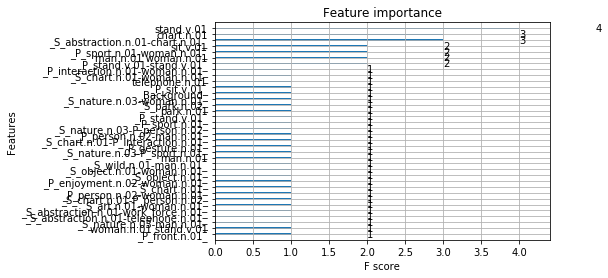

In [13]:
xgb.plot_importance(bst)

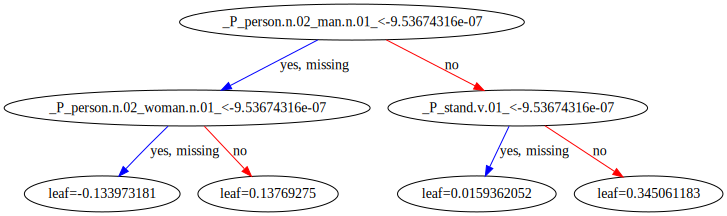

In [30]:
xgb.to_graphviz(bst, num_trees=19)

In [24]:
import glob
import re
index = []
for filename in glob.glob('images/*.svg'):
    index.append(int(re.findall(r'\d+', filename)[0]))
index.sort()
print(index)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92]


In [22]:
assert(sorted(index) == list(range(1,93)))